In [1]:
import numpy as np
import pandas as pd

In [2]:
m2 = pd.read_csv('merged_data.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [3]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 20대 남성

In [4]:
m2['CLNT_AGE'].value_counts()

30    313493
40    216161
20     95263
50     36615
60      5255
10      3807
70       844
80        32
Name: CLNT_AGE, dtype: int64

In [5]:
#M_20 = m2.loc[m2['CLNT_AGE']==20]

In [6]:
M_20 = m2.loc[(m2['GENDER_M']==1) & (m2['CLNT_AGE']==20)]
M_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.00,38000.0,1.0,46.50,417.0,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
26,296.25,62030.0,1.0,293.75,1522.5,20,0,1,2,0.0,...,0,1,0,3.0,0.0,0,0,0.0,0.0,0.0
74,74.00,99500.0,1.0,59.00,2250.0,20,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
91,50.50,37000.0,2.0,52.00,507.5,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,2.0
154,35.00,29260.0,1.0,34.00,587.0,20,0,1,2,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0


In [7]:
#대대분류 삭제
M_20_drop = M_20.drop(M_20.loc[:, M_20.columns.str.startswith('CLAC0')], axis = 1)
M_20_drop.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [8]:
mms = MinMaxScaler()
mms.fit(M_20_drop) #대대분류 뺀 column들만 갖고
M_20_transformed = mms.transform(M_20_drop)

In [9]:
# Sum_of_squared_distances = []

# for k in range(1,15):
#     km = KMeans(n_clusters=k)
#     km = km.fit(M_20_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


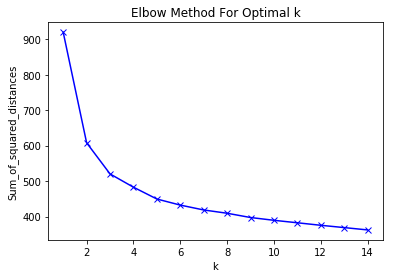

In [10]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_20_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
M_20_transformed = pd.DataFrame(M_20_transformed)
M_20_transformed.columns = m2.columns[:34]
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000
1,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212
2,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000
3,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000
4,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000


In [13]:
M_20_transformed['predict'] = km.predict(M_20_transformed)
M_20_transformed['predict'].value_counts()

1    8639
0    3531
2     849
Name: predict, dtype: int64

In [14]:
M_20_transformed.index = M_20.index

In [15]:
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000,1
26,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212,2
74,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0
91,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000,1
154,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,1


<BarContainer object of 10 artists>

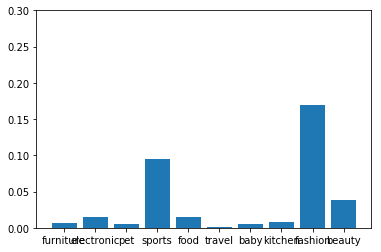

In [16]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_20[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.3)
#group0
idx=np.where(M_20_transformed['predict']==0)
clustering = M_20.loc[M_20.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

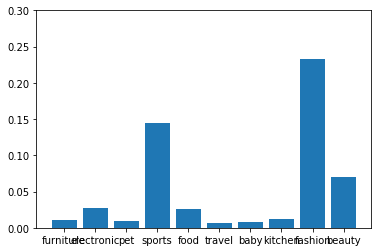

In [17]:
#group1
idx=np.where(M_20_transformed['predict']==1)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.3)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

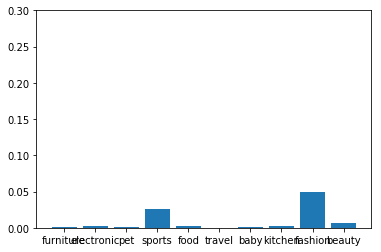

In [18]:
#group2
idx=np.where(M_20_transformed['predict']==2)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.3)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

# Scoring

In [19]:
import matplotlib.pyplot as pyplot

In [20]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [21]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [22]:
import random

In [23]:
#random data generate
for ii in range(10) :
    random_idx = M_20_transformed.index[random.randint(0,len(M_20_transformed))]
    random_data = M_20_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.22736261727446225, 0.08563378555900487, 0.628109427359173]
[0.0950540256793493, 0.19056638887465013, 0.4689779361967423]
[0.18609031490705208, 0.11458091201082293, 0.5772552632060198]
[0.16247357313356867, 0.25435297956106157, 0.4879654264231611]
[0.27721437768977336, 0.07073906903907522, 0.6866650089217892]
[0.298736943851747, 0.11177461237438577, 0.7053628355211883]
[0.6342154627579847, 0.8221534534473547, 0.32943483096889964]
[0.2657922537697041, 0.07419725614808685, 0.6701410350307173]
[0.29876104347359167, 0.3851032204578382, 0.5389625461298173]
[0.2543155520231259, 0.23564225709914594, 0.5807918264156859]


In [24]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, M_20, M_20_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_20.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,72.244673,0.0
3,sports,67.123738,3.0
9,beauty,57.803088,1.0
1,electronic,49.328590,0.0
4,food,48.729955,0.0
7,kitchen,46.645741,0.0
0,furniture,41.994394,0.0
6,baby,41.597263,0.0
2,pet,37.624055,2.0
5,travel,31.135984,0.0


# 50대 여성

In [37]:
F_50 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==50)]
F_50.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
50,22.250000,246562.500000,1.0,29.250000,180.250000,50,1,0,1,0.0,...,1,1,0,0.0,0.0,0,0,0.0,1.0,1.0
97,35.600000,61800.000000,1.0,41.600000,1716.200000,50,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,4.0,0.0
112,51.600000,34800.000000,1.0,60.000000,1254.800000,50,1,0,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
157,92.111111,33377.777778,1.0,140.777778,4183.555556,50,1,0,0,0.0,...,0,0,0,0.0,2.0,0,0,0.0,7.0,0.0
250,81.000000,6000.000000,1.0,81.000000,1625.000000,50,1,0,6,0.0,...,0,0,0,0.0,0.0,0,0,0.0,6.0,0.0


In [38]:
#대대분류 삭제
F_50_drop = F_50.drop(F_50.loc[:, F_50.columns.str.startswith('CLAC0')], axis = 1)
F_50_drop.columns
mms = MinMaxScaler()
mms.fit(F_50_drop) #대대분류 뺀 column들만 갖고
F_50_transformed = mms.transform(F_50_drop)

In [27]:
# Sum_of_squared_distances = []

# for k in range(1,30):
#     km = KMeans(n_clusters=k)
#     km = km.fit(F_50_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


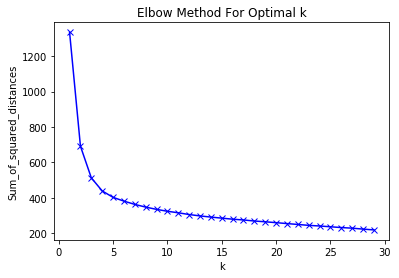

In [28]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_50_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
F_50_transformed = pd.DataFrame(F_50_transformed)
F_50_transformed.columns = m2.columns[:34]
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000
1,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000
2,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000
3,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000
4,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928


In [41]:
F_50_transformed['predict'] = km.predict(F_50_transformed)
F_50_transformed['predict'].value_counts()

2    17457
1     9122
0     2295
Name: predict, dtype: int64

In [42]:
F_50_transformed.index = F_50.index
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
50,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000,2
97,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000,2
112,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000,2
157,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000,1
250,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928,1


<BarContainer object of 10 artists>

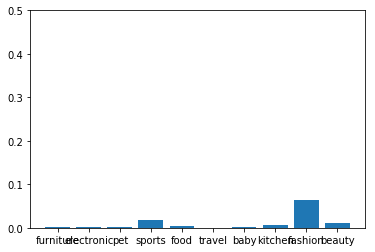

In [43]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_50[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.5)
#group0
idx=np.where(F_50_transformed['predict']==0)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

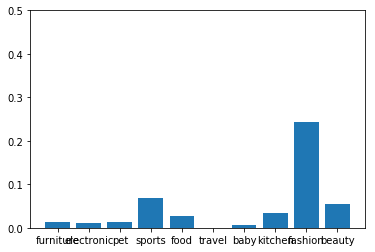

In [44]:
plt.ylim(0, 0.5)
#group1
idx=np.where(F_50_transformed['predict']==1)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

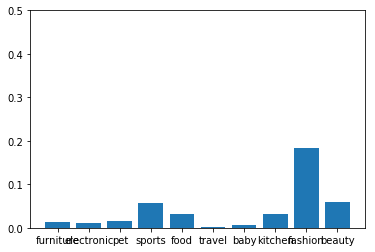

In [45]:
plt.ylim(0, 0.5)
#group2
idx=np.where(F_50_transformed['predict']==2)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [46]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum())/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [47]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_50_transformed.index[random.randint(0,len(F_50_transformed))]
    random_data = F_50_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.11431843001243601, 0.41276426794228543, 0.6237485372588265]
[0.3835528470502492, 0.7396063904353067, 0.9544467857322658]
[0.6353449372945924, 0.2735265847437089, 0.05942963993401492]
[0.3258355547601801, 0.14605133156326935, 0.31683969445947263]
[0.48154359236848965, 0.12921431237930686, 0.11261848983988991]
[0.526205003947998, 0.17093623171800099, 0.10004496394816144]
[0.18516273291575344, 0.27270640603551305, 0.4667982644615091]
[0.3503247248217736, 0.13773639016934364, 0.2883661757990504]
[0.5999938334454967, 0.23721639307020692, 0.030276482327856177]
[0.47387631558068904, 0.8227844664244242, 1.0311085535476043]


In [48]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_50, F_50_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_50.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,22.538139,0.0
3,sports,19.553776,3.0
9,beauty,19.120245,0.0
4,food,17.391044,0.0
7,kitchen,17.050177,0.0
0,furniture,15.384560,0.0
2,pet,15.230903,0.0
1,electronic,14.808512,0.0
6,baby,13.705927,0.0
5,travel,5.071926,0.0


# 40대 남성

In [49]:
M_40 = m2.loc[(m2['GENDER_M']==1) & (m2['CLNT_AGE']==40)]
M_40.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
2,58.000000,15360.000000,1.000000,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
10,36.000000,71100.000000,1.000000,46.000000,415.500000,40,0,1,1,0.0,...,0,0,0,1.0,1.0,0,0,0.0,0.0,0.0
13,12.000000,39000.000000,1.000000,11.000000,71.000000,40,0,1,0,0.0,...,0,0,0,2.0,0.0,0,0,0.0,0.0,0.0
19,80.833333,66433.333333,1.000000,103.500000,1126.500000,40,0,1,1,0.0,...,0,0,0,3.0,0.0,0,0,0.0,3.0,0.0
38,118.333333,49643.333333,1.666667,160.666667,1993.333333,40,0,1,4,0.0,...,0,0,6,0.0,0.0,0,0,0.0,0.0,0.0


In [50]:
#대대분류 삭제
M_40_drop = M_40.drop(M_40.loc[:, M_40.columns.str.startswith('CLAC0')], axis = 1)
M_40_drop.columns
#mms = MinMaxScaler()
mms=MaxAbsScaler()
mms.fit(M_40_drop) #대대분류 뺀 column들만 갖고
M_40_transformed = mms.transform(M_40_drop)

In [51]:
# Sum_of_squared_distances = []

# for k in range(1,15):
#     km = KMeans(n_clusters=k)
#     km = km.fit(M_40_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


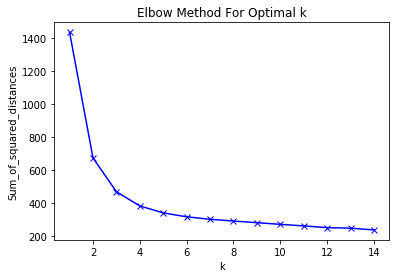

In [52]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
k=4
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_40_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
M_40_transformed = pd.DataFrame(M_40_transformed)
M_40_transformed.columns = m2.columns[:34]
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.117172,0.002657,0.005000,0.196794,0.082938,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.011574
1,0.072727,0.012301,0.005000,0.092184,0.015888,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.0,0.000648,0.0,0.0,0.002439,0.001613,0.0,0.0,0.000000
2,0.024242,0.006747,0.005000,0.022044,0.002715,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.001295,0.0,0.0,0.004878,0.000000,0.0,0.0,0.000000
3,0.163300,0.011494,0.005000,0.207415,0.043075,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.0,0.001295,0.0,0.0,0.000000,0.000000,0.0,0.0,0.013889
4,0.239057,0.008589,0.008333,0.321977,0.076221,1.0,0.0,1.0,0.008493,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.004878,0.006452,0.0,0.0,0.000000


In [55]:
M_40_transformed = pd.DataFrame(M_40_transformed)
M_40_transformed.columns = m2.columns[:34]
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.117172,0.002657,0.005000,0.196794,0.082938,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.011574
1,0.072727,0.012301,0.005000,0.092184,0.015888,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.0,0.000648,0.0,0.0,0.002439,0.001613,0.0,0.0,0.000000
2,0.024242,0.006747,0.005000,0.022044,0.002715,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.001295,0.0,0.0,0.004878,0.000000,0.0,0.0,0.000000
3,0.163300,0.011494,0.005000,0.207415,0.043075,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.0,0.001295,0.0,0.0,0.000000,0.000000,0.0,0.0,0.013889
4,0.239057,0.008589,0.008333,0.321977,0.076221,1.0,0.0,1.0,0.008493,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.004878,0.006452,0.0,0.0,0.000000


In [56]:
M_40_transformed['predict'] = km.predict(M_40_transformed)
M_40_transformed['predict'].value_counts()

0    17923
3    11442
2     5024
1     1420
Name: predict, dtype: int64

In [57]:
M_40_transformed.index = M_40.index
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
2,0.117172,0.002657,0.005000,0.196794,0.082938,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.011574,3
10,0.072727,0.012301,0.005000,0.092184,0.015888,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.000648,0.0,0.0,0.002439,0.001613,0.0,0.0,0.000000,0
13,0.024242,0.006747,0.005000,0.022044,0.002715,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.001295,0.0,0.0,0.004878,0.000000,0.0,0.0,0.000000,0
19,0.163300,0.011494,0.005000,0.207415,0.043075,1.0,0.0,1.0,0.002123,0.0,...,0.0,0.001295,0.0,0.0,0.000000,0.000000,0.0,0.0,0.013889,3
38,0.239057,0.008589,0.008333,0.321977,0.076221,1.0,0.0,1.0,0.008493,0.0,...,0.0,0.000000,0.0,0.0,0.004878,0.006452,0.0,0.0,0.000000,2


<BarContainer object of 10 artists>

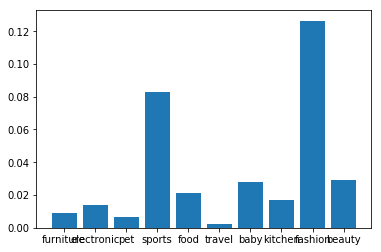

In [58]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_40[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.2)
#group0
idx=np.where(M_40_transformed['predict']==0)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

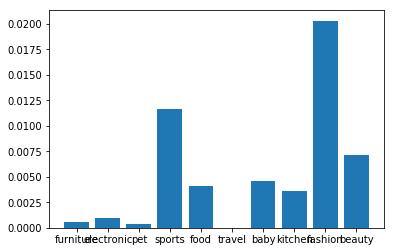

In [59]:
#plt.ylim(0, 0.2)
#group1
idx=np.where(M_40_transformed['predict']==1)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

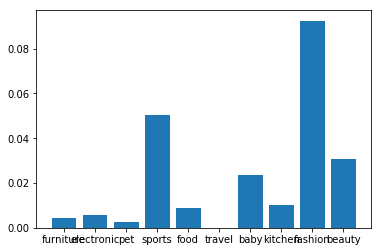

In [60]:
#plt.ylim(0, 0.2)
#group2
idx=np.where(M_40_transformed['predict']==2)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

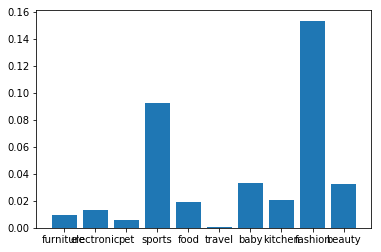

In [61]:
#plt.ylim(0, 0.2)
#group3
idx=np.where(M_40_transformed['predict']==3)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [62]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([4,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_40_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [63]:
import random
#random data generate
for ii in range(10) :
    random_idx = M_40_transformed.index[random.randint(0,len(M_40_transformed))]
    random_data = M_40_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.06349493279575556, 0.7727997038298067, 0.4145164356847799, 0.2045671518872604]
[0.07427658263668115, 0.6558011716816097, 0.29657705750065383, 0.09038710785116555]
[0.08893212577823807, 0.6290828124627122, 0.26995223765373366, 0.06111616374141808]
[0.03521292375565715, 0.7471638371771465, 0.38807427369281183, 0.1773097778141783]
[0.03683946162303917, 0.7435249074423164, 0.38423703166017753, 0.1740999206144485]
[0.04820531635230194, 0.747151287067445, 0.38920221580434045, 0.18032265354547083]
[0.030671587181118915, 0.7410528897687291, 0.38271292058294754, 0.17232631716398353]
[0.21905803287512668, 0.5252458599315114, 0.17520479386422838, 0.0981769575140276]
[0.05775628090061544, 0.7731218213037347, 0.41421973613650864, 0.20319086734952332]
[0.12088759153538038, 0.5964416485028554, 0.23793961722515863, 0.03351716516688038]


In [64]:
score=[]
for i in range(10) :
    score.append(clustering_index(4, random_data, M_40, M_40_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_40.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,71.258219,1.0
3,sports,67.547318,0.0
9,beauty,61.336535,2.0
6,baby,60.432267,0.0
4,food,57.103946,0.0
7,kitchen,57.024575,0.0
1,electronic,52.675053,0.0
0,furniture,49.708040,0.0
2,pet,46.809969,0.0
5,travel,30.793810,0.0


# 40대 여성

In [65]:
F_40 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==40)]
F_40.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
5,31.400000,17340.000000,1.2,76.600000,1774.600000,40,1,0,5,0.0,...,0,0,0,0.0,0.0,0,0,5.0,0.0,0.0
6,69.454545,121248.181818,1.0,75.545455,1327.909091,40,1,0,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,6.0,5.0
7,16.000000,30900.000000,1.0,20.000000,214.500000,40,1,0,0,0.0,...,0,0,0,2.0,0.0,0,0,0.0,0.0,0.0
9,31.666667,52166.666667,1.0,48.666667,618.333333,40,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,1.0,1.0


In [66]:
#대대분류 삭제
F_40_drop = F_40.drop(F_40.loc[:, F_40.columns.str.startswith('CLAC0')], axis = 1)
F_40_drop.columns
mms = MinMaxScaler()
mms.fit(F_40_drop) #대대분류 뺀 column들만 갖고
F_40_transformed = mms.transform(F_40_drop)

In [67]:
# Sum_of_squared_distances = []

# for k in range(1,15):
#     km = KMeans(n_clusters=k)
#     km = km.fit(F_40_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


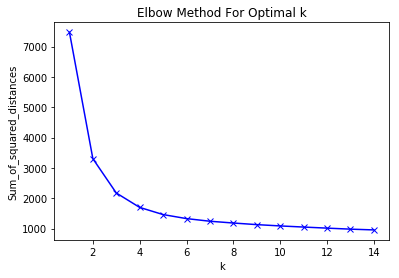

In [68]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_40_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
F_40_transformed = pd.DataFrame(F_40_transformed)
F_40_transformed.columns = m2.columns[:34]
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [71]:
F_40_transformed = pd.DataFrame(F_40_transformed)
F_40_transformed.columns = m2.columns[:34]
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [72]:
F_40_transformed['predict'] = km.predict(F_40_transformed)
F_40_transformed['predict'].value_counts()

2    110137
0     55774
1     14441
Name: predict, dtype: int64

In [73]:
F_40_transformed.index = F_40.index
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
3,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000,2
5,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631,2
6,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483,2
7,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000,2
9,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000,2


<BarContainer object of 10 artists>

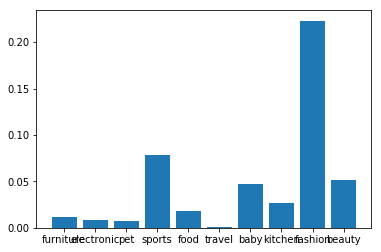

In [74]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_40[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(F_40_transformed['predict']==0)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

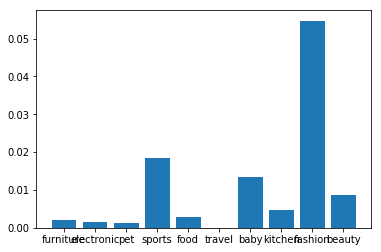

In [75]:
#group1
idx=np.where(F_40_transformed['predict']==1)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

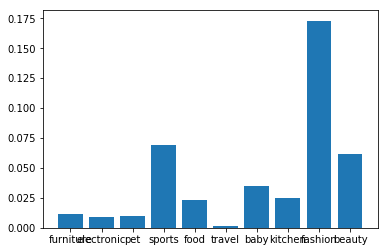

In [76]:
#plt.ylim(0, 0.5)
#group2
idx=np.where(F_40_transformed['predict']==2)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [77]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
        sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(F_40_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [78]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_40_transformed.index[random.randint(0,len(F_40_transformed))]
    random_data = F_40_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.12875571960023247, 0.27095588801658793, 0.3336024684591508]
[0.14008375130791445, 0.5013835358384682, 0.11132035450797773]
[0.03879788587396106, 0.38628181485948443, 0.205639155079932]
[0.2789635324514873, 0.6457328900842106, 0.06402988037999423]
[0.20332859339293166, 0.5534221603727838, 0.11802130768275722]
[0.10819737286325569, 0.3284278881142681, 0.285361166610975]
[0.2515375506588847, 0.6192113599334834, 0.03747012995579434]
[0.10741003723585296, 0.27220218446496336, 0.31901939308068666]
[0.1900041410380634, 0.5575949673955166, 0.04293513069501107]
[0.15675784420456582, 0.5224577529948532, 0.07518718689256051]


In [79]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_40, F_40_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_40.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,1.962523,6.0
3,sports,1.808112,0.0
9,beauty,1.766712,0.0
6,baby,1.711889,1.0
7,kitchen,1.638000,0.0
4,food,1.607255,0.0
0,furniture,1.513761,0.0
1,electronic,1.473100,0.0
2,pet,1.470474,0.0
5,travel,1.089574,0.0


# 60-80 대 남성

In [80]:
M_678 = m2.loc[(m2['GENDER_M']==1)]
M_678 = M_678.loc[(M_678['CLNT_AGE']==60) | (M_678['CLNT_AGE']==70) | (M_678['CLNT_AGE']==80)]  
M_678['CLNT_AGE'].value_counts()

60    1471
70     303
80       9
Name: CLNT_AGE, dtype: int64

In [81]:
#대대분류 삭제
M_678_drop = M_678.drop(M_678.loc[:, M_678.columns.str.startswith('CLAC0')], axis = 1)
M_678_drop.columns
#mms = MinMaxScaler()
mms = MaxAbsScaler()
#mms = RobustScaler()
mms.fit(M_678_drop) #대대분류 뺀 column들만 갖고
M_678_transformed = mms.transform(M_678_drop)

In [82]:
# Sum_of_squared_distances = []

# for k in range(1,30):
#     km = KMeans(n_clusters=k)
#     km = km.fit(M_678_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

ValueError: x and y must have same first dimension, but have shapes (29,) and (14,)

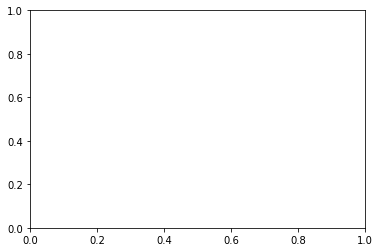

In [83]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [86]:
k=5
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_678_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
M_678_transformed = pd.DataFrame(M_678_transformed)
M_678_transformed.columns = m2.columns[:34]
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000
1,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
2,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000
3,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
4,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000


In [88]:
M_678_transformed = pd.DataFrame(M_678_transformed)
M_678_transformed.columns = m2.columns[:34]
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000
1,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
2,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000
3,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
4,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000


In [89]:
M_678_transformed['predict'] = km.predict(M_678_transformed)
M_678_transformed['predict'].value_counts()

1    1002
2     547
0     160
4      60
3      14
Name: predict, dtype: int64

In [90]:
M_678_transformed.index = M_678.index
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
29,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000,2
247,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282,2
378,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000,1
817,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282,2
1440,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000,1


<BarContainer object of 10 artists>

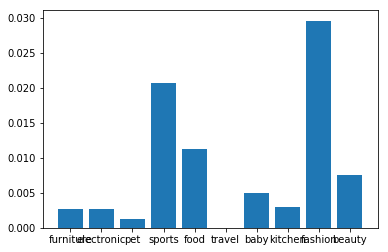

In [91]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_678[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(M_678_transformed['predict']==0)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

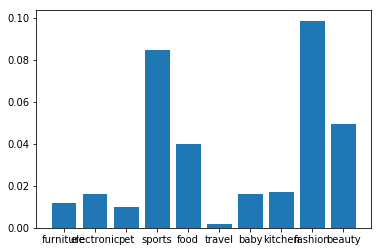

In [92]:
#plt.ylim(0, 0.3)
#group1
idx=np.where(M_678_transformed['predict']==1)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

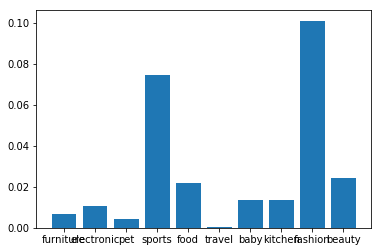

In [93]:
#plt.ylim(0, 0.3)
#group2
idx=np.where(M_678_transformed['predict']==2)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

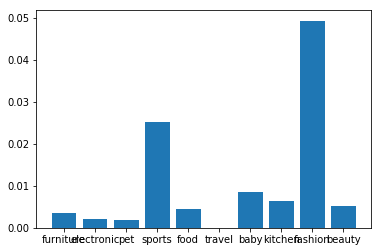

In [94]:
#plt.ylim(0, 0.3)
#group3
idx=np.where(M_678_transformed['predict']==3)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

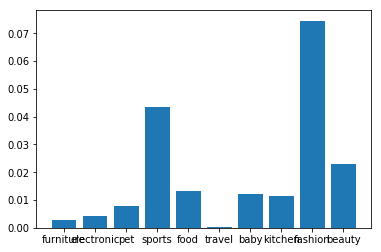

In [95]:
#plt.ylim(0, 0.3)
#group4
idx=np.where(M_678_transformed['predict']==4)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [96]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([5,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_678_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [97]:
import random
#random data generate
for ii in range(10) :
    random_idx = M_678_transformed.index[random.randint(0,len(M_678_transformed))]
    random_data = M_678_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.7207225579073785, 0.14601250906599228, 0.34392008686787195, 1.332784015702599, 0.6094386202108271]
[0.568447982378224, 0.205708899358509, 0.2410912032144013, 1.2897100336200786, 0.5702791886574642]
[1.3144043092219913, 1.283628148894559, 1.2507558748143481, 1.4546765876486234, 1.152884376263348]
[0.6383511804038294, 0.08148129078097596, 0.25537668693041154, 1.2856850655317966, 0.554481915958893]
[0.7439146076033187, 0.11723881777186551, 0.3533150898245165, 1.329771807376389, 0.6080570413231502]
[0.6384641583292734, 0.1288708258815973, 0.26827344977308965, 1.2901712957498792, 0.5613920905119557]
[0.7387305596048415, 0.11565826161228027, 0.3481280584973417, 1.3112880236652864, 0.5927196574533503]
[0.6416722521746744, 0.21935268466767108, 0.298581523036641, 1.179011264640273, 0.4592756452656779]
[0.6885184755193753, 0.08453297589889816, 0.30050696750579936, 1.3201314887957531, 0.5770244219190691]
[0.7198524573939591, 0.10068474393083358, 0.329972102195526, 1.331696282916054, 0.60749253

In [98]:
score=[]
for i in range(10) :
    score.append(clustering_index(5, random_data, M_678, M_678_transformed, i)*100)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_678.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,4.719771,0.0
3,sports,4.488082,2.0
9,beauty,3.873067,0.0
4,food,3.806955,0.0
6,baby,3.393467,0.0
7,kitchen,3.299473,0.0
1,electronic,3.071886,0.0
0,furniture,2.936543,0.0
2,pet,2.750443,0.0
5,travel,-4.355373,0.0


# 60-80 대 여성

In [99]:
F_678 = m2.loc[(m2['GENDER_F']==1)]
F_678 = F_678.loc[(F_678['CLNT_AGE']==60) | (F_678['CLNT_AGE']==70) | (F_678['CLNT_AGE']==80)]  
F_678['CLNT_AGE'].value_counts()

60    3784
70     541
80      23
Name: CLNT_AGE, dtype: int64

In [100]:
#대대분류 삭제
F_678_drop = F_678.drop(F_678.loc[:, F_678.columns.str.startswith('CLAC0')], axis = 1)
F_678_drop.columns
#mms = MinMaxScaler()
mms = MaxAbsScaler()
#mms = RobustScaler()
mms.fit(F_678_drop) #대대분류 뺀 column들만 갖고
F_678_transformed = mms.transform(F_678_drop)

In [101]:
# Sum_of_squared_distances = []

# for k in range(1,30):
#     km = KMeans(n_clusters=k)
#     km = km.fit(F_678_transformed)
#     Sum_of_squared_distances.append(km.inertia_)
#     print(k)

ValueError: x and y must have same first dimension, but have shapes (29,) and (14,)

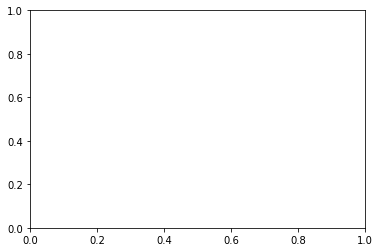

In [102]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [103]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_678_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
F_678_transformed = pd.DataFrame(F_678_transformed)
F_678_transformed.columns = m2.columns[:34]
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
1,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
2,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000
3,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
4,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000


In [105]:
F_678_transformed = pd.DataFrame(F_678_transformed)
F_678_transformed.columns = m2.columns[:34]
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
1,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
2,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000
3,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
4,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000


In [106]:
F_678_transformed['predict'] = km.predict(F_678_transformed)
F_678_transformed['predict'].value_counts()

2    2773
0    1297
1     278
Name: predict, dtype: int64

In [107]:
F_678_transformed.index = F_678.index
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
107,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,0
221,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,2
307,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000,0
425,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,2
555,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000,2


<BarContainer object of 10 artists>

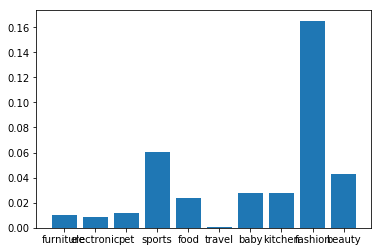

In [108]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_678[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(F_678_transformed['predict']==0)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

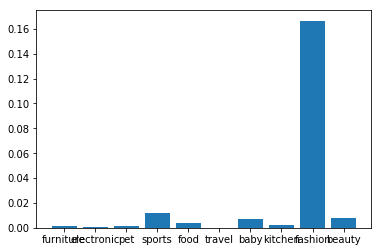

In [109]:
#plt.ylim(0, 0.3)
#group1
idx=np.where(F_678_transformed['predict']==1)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

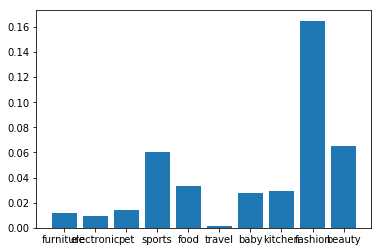

In [110]:
#plt.ylim(0, 0.3)
#group2
idx=np.where(F_678_transformed['predict']==2)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [111]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(F_678_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [112]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_678_transformed.index[random.randint(0,len(F_678_transformed))]
    random_data = F_678_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.31937951951588744, 0.7357565122788235, 0.08506452867251209]
[0.3555713506610009, 0.7719466022515717, 0.1191565305772343]
[0.0810605248787912, 0.3734947305613172, 0.2944191522637417]
[0.1873805516183061, 0.5638965155405155, 0.19625179446527063]
[0.17458825456622398, 0.5859975073388041, 0.07966084278154592]
[0.1505637658990964, 0.4969131848889076, 0.2438655311471196]
[0.18285635698548575, 0.5572449317015653, 0.19329186651073568]
[0.26663716578648144, 0.6800282842516745, 0.04806644582028265]
[0.3256140466583056, 0.736404423404775, 0.11392422406201619]
[0.2701450338128531, 0.6848283043739255, 0.06652027399396113]


In [113]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_678, F_678_transformed, i)*100)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_678.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,Category,Score,Buy_CT
8,fashion,244.779372,5.0
3,sports,216.214311,1.0
9,beauty,215.863791,4.0
4,food,197.068769,0.0
7,kitchen,195.203117,0.0
6,baby,193.962901,4.0
2,pet,173.453988,0.0
0,furniture,169.554526,0.0
1,electronic,163.066192,0.0
5,travel,104.305645,0.0


In [114]:
labels

['furniture',
 'electronic',
 'pet',
 'sports',
 'food',
 'travel',
 'baby',
 'kitchen',
 'fashion',
 'beauty']

In [115]:
F_678.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
107,85.000000,72000.000000,1.0,94.000000,1507.000000,60,1,0,2,0.0,...,0,0,0,2.0,0.0,0,0,0.0,0.0,0.0
221,45.500000,21250.000000,1.0,77.500000,911.500000,60,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
307,125.000000,37450.000000,1.0,124.000000,1118.000000,60,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
425,56.000000,14400.000000,1.0,49.000000,1169.000000,60,1,0,2,0.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,2.0
555,47.333333,123666.666667,1.0,66.666667,1547.666667,60,1,0,0,0.0,...,0,0,0,0.0,2.0,0,0,0.0,1.0,0.0


In [116]:
import tqdm
F_678_pet=[]
for i in tqdm.tqdm(arange(len(F_678))):
        F_678_pet.append(clustering_index(3, i, F_678, F_678_transformed, 2))

  0%|                                                                                         | 0/4348 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
  9%|███████▎                                                                       | 400/4348 [00:06<01:03, 62.50it/s]


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(F_678_pet)*10000

In [133]:
F_678_transformed_=F_678_transformed.loc[:, :"month_9"]

In [140]:
F_678_transformed_['CUSID']=F_678_transformed_.index

In [141]:
F_678_transformed_.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,CUSID
107,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,107
221,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,221
307,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000,307
425,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,425
555,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000,555


In [296]:
def scorefun(k, x, data, transformed_data, category) :

    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([k,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(transformed_data['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k
    xdata=transformed_data.loc[x, :"month_9"]
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - xdata)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)*100

In [297]:
F_678['furniture_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,0))

In [298]:
F_678['travel_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,5))

In [299]:
F_678['electronic_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,1))
F_678['pet_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,2))
F_678['sports_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,3))
F_678['food_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,4))
F_678['travel_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,5))
F_678['baby_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,6))
F_678['kitchen_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,7))
F_678['fashion_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,8))
F_678['beauty_SCORE'] = F_678_transformed_['CUSID'].apply(lambda x: scorefun(3, x, F_678, F_678_transformed,9))

In [300]:
F_678['CUSID']=F_678.index

In [301]:
F_678[['CUSID','furniture_SCORE', 'electronic_SCORE', 'pet_SCORE', 'sports_SCORE',
       'food_SCORE', 'travel_SCORE', 'baby_SCORE', 'kitchen_SCORE',
       'fashion_SCORE', 'beauty_SCORE']].to_csv('F_678.csv',index=False)

In [120]:
F_678_Score=pd.read_csv('F_678.csv',dtype={'CUSID':str})
F_678_Score.head()

,CUSID,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,107,119.033547,114.836504,121.898477,153.074977,137.316693,61.793555,137.268115,137.981536,173.355164,150.180045
1,221,188.499707,181.702186,193.146350,241.031491,219.089560,113.933380,215.986738,217.599506,272.630729,240.066689
2,307,128.041857,123.589657,131.078226,165.228087,147.032089,59.824851,148.230457,148.798240,187.256383,160.618080
3,425,241.857720,233.089376,247.853570,308.834738,281.611977,151.148492,276.696557,278.914981,349.219301,308.714432
4,555,206.570819,199.112241,211.669748,264.053250,240.194972,125.854934,236.606680,238.404072,298.649777,263.220849


In [186]:
F_678_Score.mean().values

array([         inf, 131.73579851, 127.02980676, 134.95081002,
       168.85394965, 152.63141833,  74.88442053, 151.35496007,
       152.33968328, 191.08969859, 167.11268185])

In [173]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [210]:
labels=np.array(labels)
stats=F_678_Score.loc[50,['furniture_SCORE', 'electronic_SCORE', 'pet_SCORE',
       'sports_SCORE', 'food_SCORE', 'travel_SCORE', 'baby_SCORE',
       'kitchen_SCORE', 'fashion_SCORE', 'beauty_SCORE']].values

In [211]:
mean_stats

array([131.73579851, 127.02980676, 134.95081002, 168.85394965,
       152.63141833,  74.88442053, 151.35496007, 152.33968328,
       191.08969859, 167.11268185, 131.73579851])

In [212]:
mean_stats=F_678_Score.mean()[1:].values
mean_stats=np.concatenate((mean_stats,[mean_stats[0]]))

In [213]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

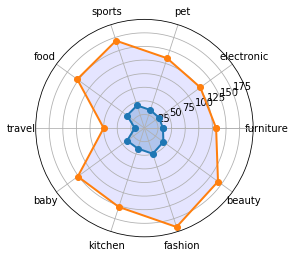

In [214]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([F_678_Score.loc[2,"Name"]])
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)


ax.grid(True)

In [215]:
F_678_Score.loc[50,['furniture_SCORE', 'electronic_SCORE', 'pet_SCORE',
       'sports_SCORE', 'food_SCORE', 'travel_SCORE', 'baby_SCORE',
       'kitchen_SCORE', 'fashion_SCORE', 'beauty_SCORE']].values

array([34.09546588972625, 32.8937148016916, 34.91577014664296,
       43.850083353919274, 39.32773140449133, 17.653904346867716,
       39.322470423457474, 39.52543857878744, 49.66053026936829,
       43.01051998372486], dtype=object)